Enter dataset (FD001, FD002, FD003, FD004): FD003
Loading and preprocessing data...


/content/utils.py:206: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['RUL'].clip(upper=threshold, inplace=True)


Data successfully loaded.
Train shape: (17692, 30, 5), (17692, 1)
Validation shape: (4128, 30, 5), (4128, 1)
Test shape: (100, 30, 5), (100,)
Creating model...


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input             │ (None, 30, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_3 (NotEqual)    │ (None, 30, 5)          │              0 │ encoder_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking_3 (Masking)       │ (None, 30, 5)          │              0 │ encoder_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_3 (Any)               │ (None, 30)             │              0 │ not_equal_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 600)            │        734,400 │ masking_3[0][0],       │
│ (Bidirectional)           │                        │                │ any_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 2)              │          1,202 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 2)              │          1,202 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_3 (Sampling)     │ (None, 2)              │              0 │ dense_9[0][0],         │
│                           │                        │                │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 736,804 (2.81 MB)

 Trainable params: 736,804 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ z_sampling_reg (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 200)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reg_output (Dense)                   │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Model successfully created.
Starting model training...
Epoch 1/100

Epoch 1: val_loss improved from inf to 569.62463, saving model to ./checkpoints/checkpoint.weights.h5
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
139/139 - 10s - 72ms/step - kl_loss: 149.8558 - loss: 6604.6060 - reg_loss: 6454.7515 - val_kl_loss: 68.0400 - val_loss: 569.6246 - val_reg_loss: 501.5847
Epoch 2/100

Epoch 2: val_loss did not improve from 569.62463
139/139 - 2s - 18ms/step - kl_loss: 109.4286 - loss: 3380.7209 - reg_loss: 3271.2913 - val_kl_loss: 15.0613 - val_loss: 589.5504 - val_reg_loss: 574.4891
Epoch 3/100

Epoch 3: val_loss did not improve from 569.62463
139/139 - 2s - 18ms/step - kl_loss: 74.5037 - loss: 1847.9164 - reg_loss: 1773.4127 - val_kl_loss: 21.2420 - val_loss: 2958.1313 - val_reg_loss: 2936.8894
Epoch 4/100

Epoch 4: val_loss did not improve from 569.62463
139/139 - 2s - 17ms/step - kl_loss: 54.3388 - loss: 1112.9468 - reg_loss: 1058.6078 - val_kl_loss: 8.5165 - val_loss: 1073.5175 - val_

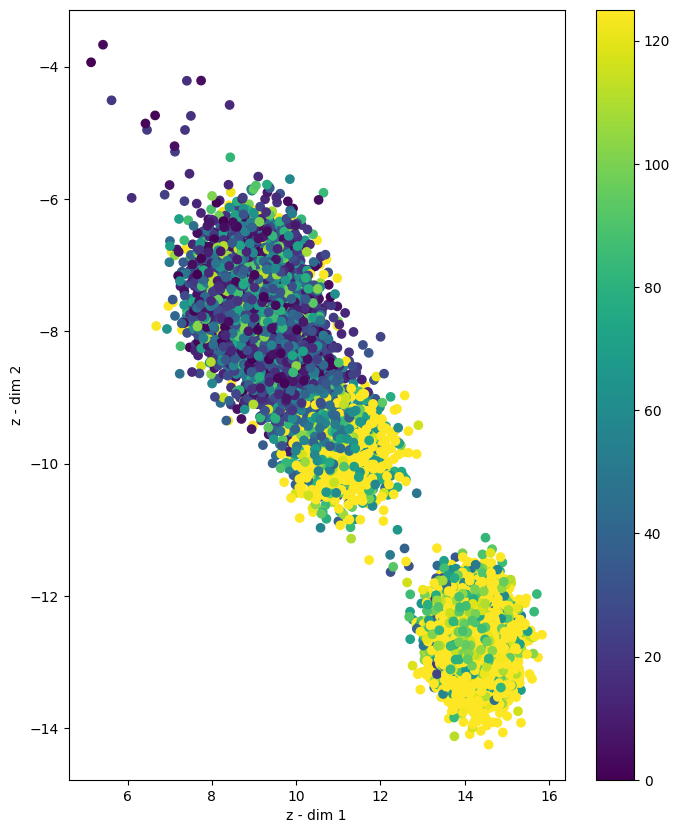

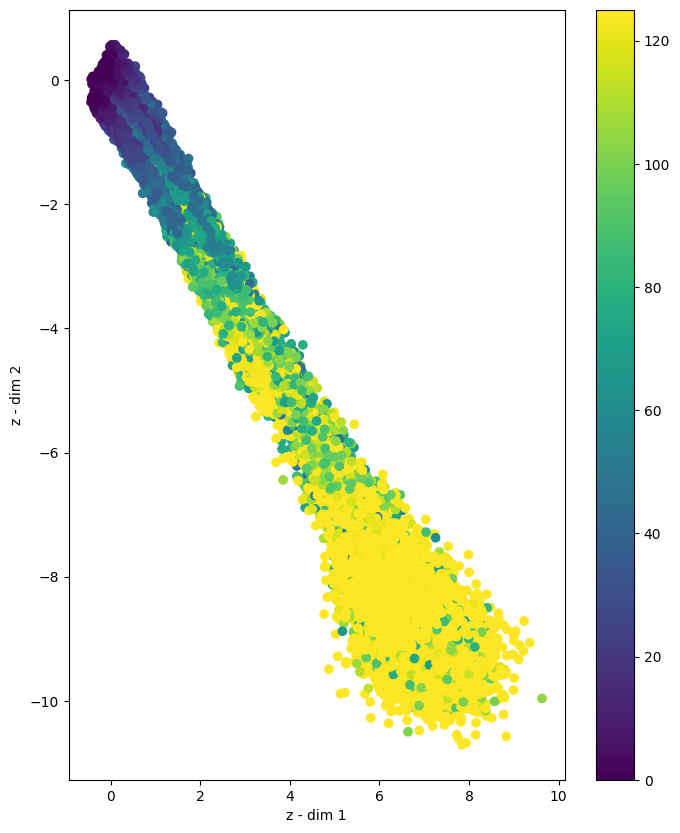

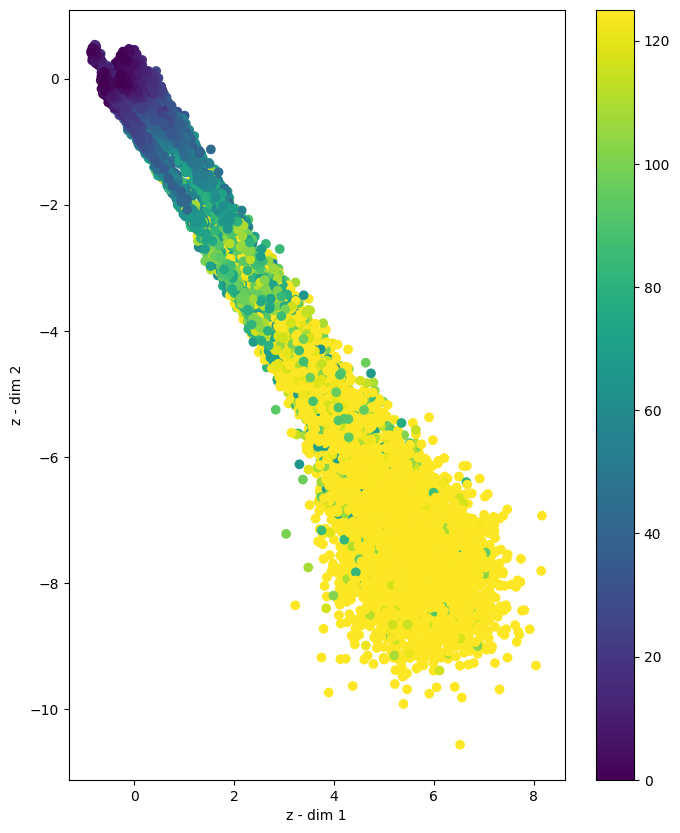

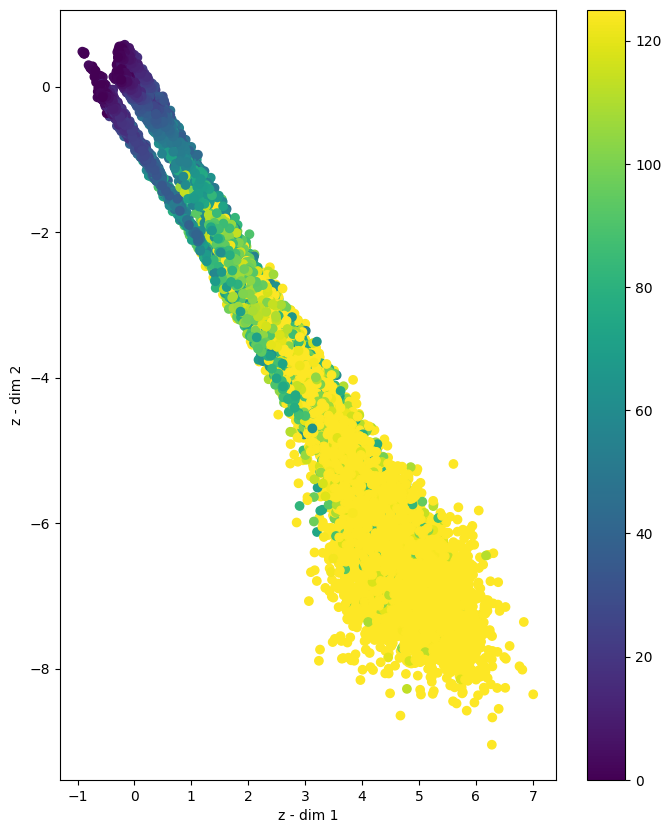

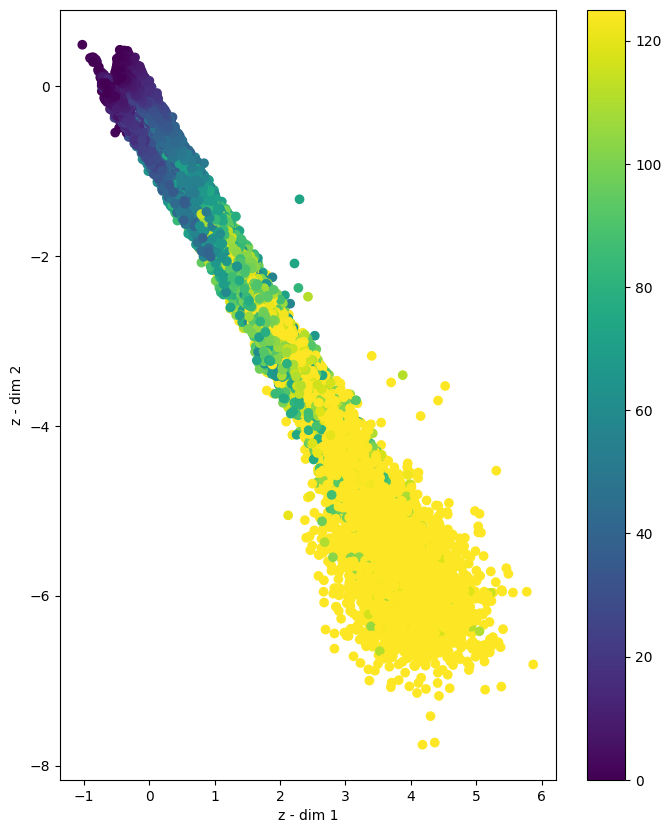

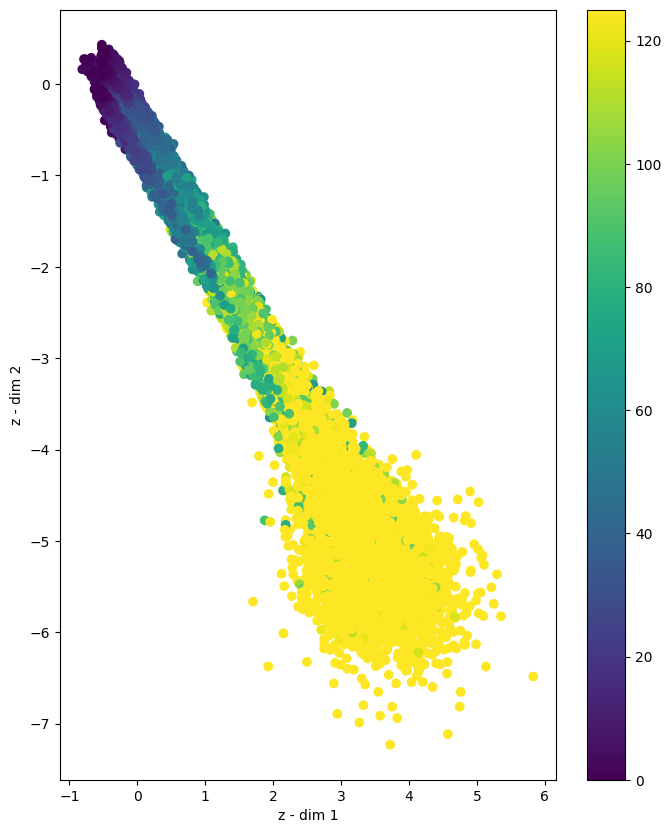

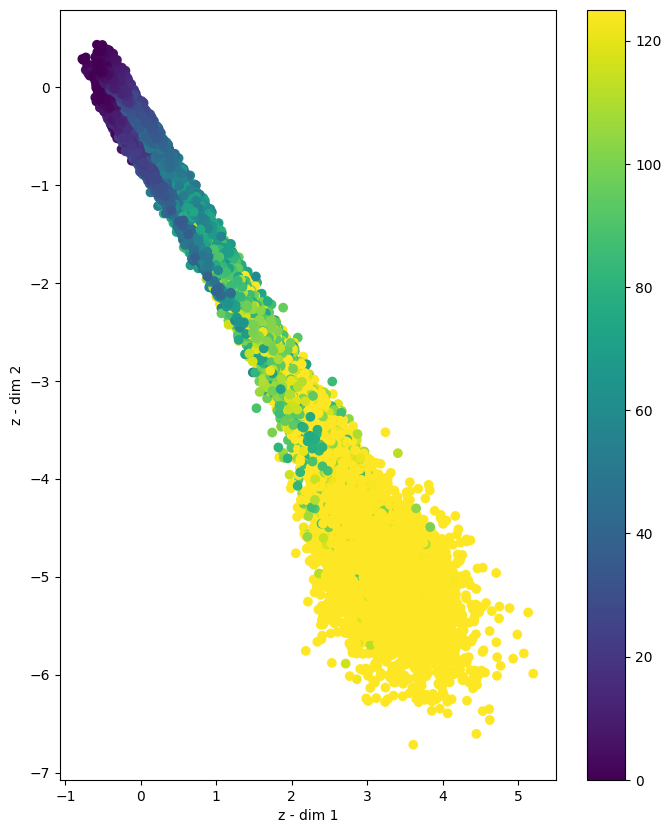

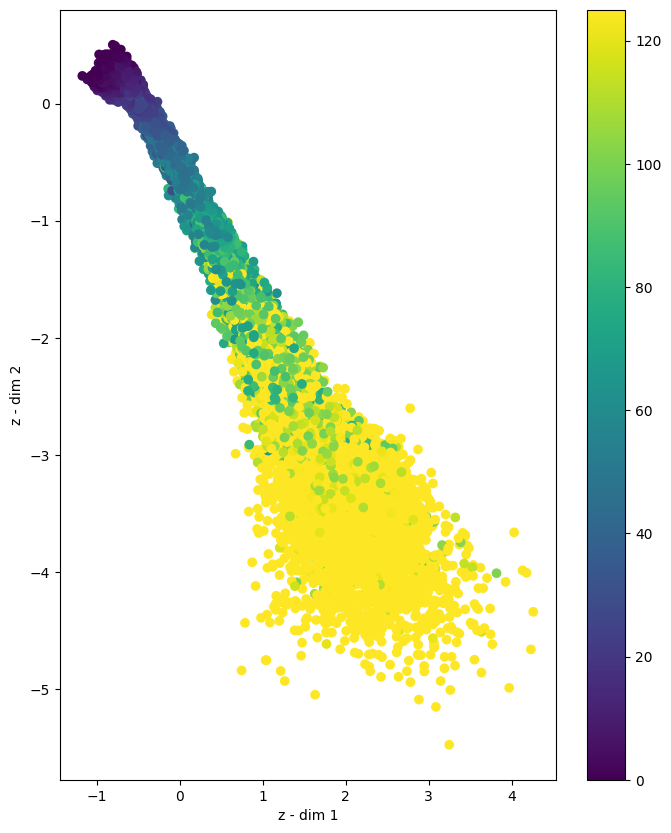

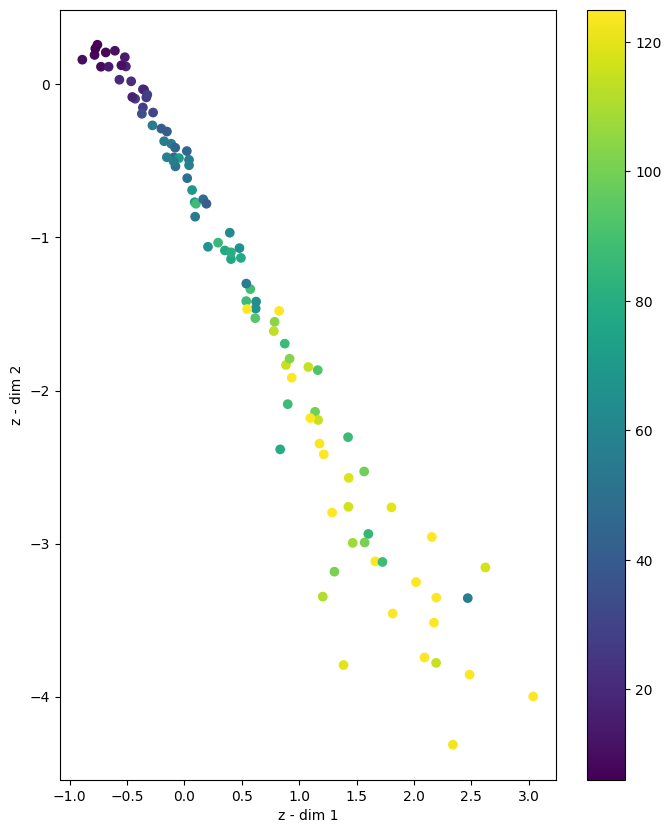

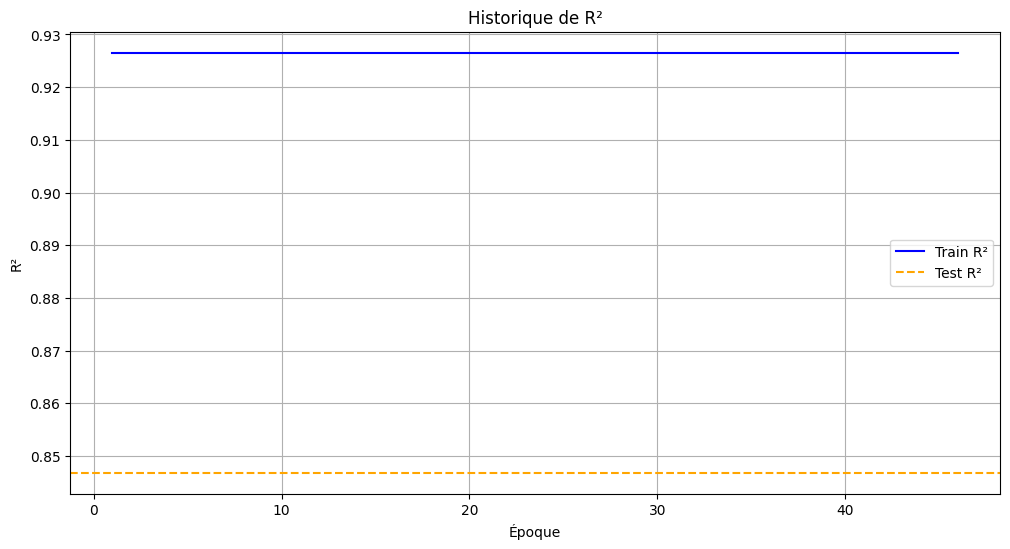

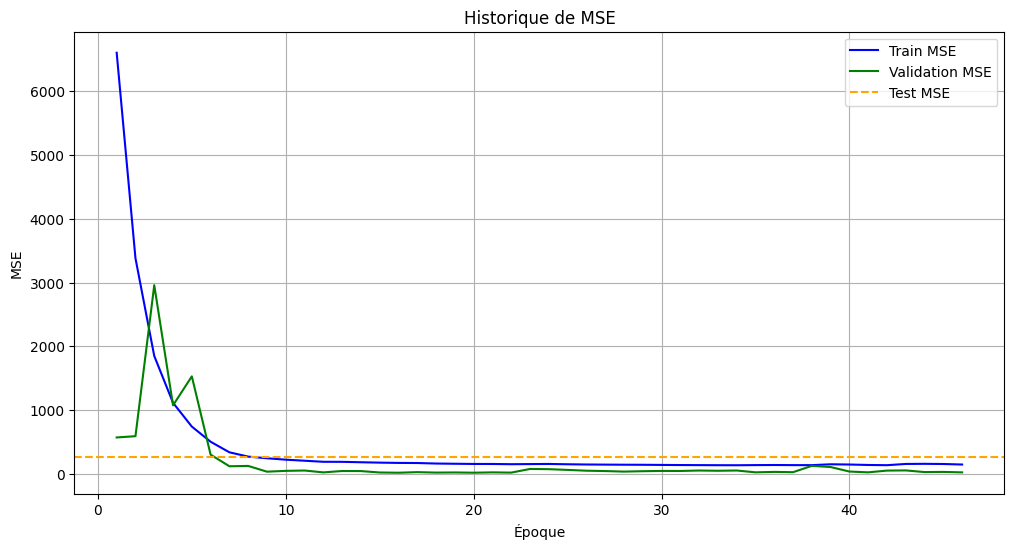

Train MSE: 125.7473, Train R²: 0.9265
Test MSE: 262.4625, Test R²: 0.8468
Evaluation completed.


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import utils
import model

# -------------------- CONFIGURATION ----------------------

# Dataset et paramètres

dataset = input("Enter dataset (FD001, FD002, FD003, FD004): ")
sensors = ['s_3', 's_4', 's_7', 's_11', 's_12']  # Sélection de capteurs
sequence_length = 30  # Longueur des séquences temporelles
alpha = 0.1  # Intensité du lissage exponentiel
threshold = 125  # Valeur maximale de RUL

# -------------------- CHARGEMENT DES DONNÉES ----------------------

print("Loading and preprocessing data...")
x_train, y_train, x_val, y_val, x_test, y_test = utils.get_data(
    dataset, sensors, sequence_length, alpha, threshold
)

print(f"Data successfully loaded.\nTrain shape: {x_train.shape}, {y_train.shape}\nValidation shape: {x_val.shape}, {y_val.shape}\nTest shape: {x_test.shape}, {y_test.shape}")

# -------------------- MODÈLE ----------------------

print("Creating model...")
timesteps = x_train.shape[1]
input_dim = x_train.shape[2]
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 100

RVE = model.create_model(
    timesteps, input_dim, intermediate_dim, batch_size, latent_dim, epochs, optimizer='adam'
)

os.makedirs('./checkpoints', exist_ok=True)

# Initialisation des callbacks
model_callbacks = utils.get_callbacks(RVE, x_train, y_train)
print("Model successfully created.")

# -------------------- ENTRAÎNEMENT ----------------------

print("Starting model training...")
results = RVE.fit(
    x_train, y_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=model_callbacks,
    verbose=2
)
print("Model training completed.")

RVE.save_weights('./checkpoints/checkpoint.weights.h5')
print("Model weights saved.")

# -------------------- ÉVALUATION ----------------------

print("Loading best weights for evaluation...")
RVE.load_weights('./checkpoints/checkpoint.weights.h5')

# Visualisation de l'espace latent
print("Visualizing latent space...")
train_mu = utils.viz_latent_space(
    RVE.encoder, np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)), save=True, show=False
)
test_mu = utils.viz_latent_space(
    RVE.encoder, x_test, np.squeeze(y_test.clip(upper=threshold)), save=True, show=False
)

# Évaluation des performances
print("Evaluating model performance...")
y_hat_train = RVE.regressor.predict(train_mu)
y_hat_test = RVE.regressor.predict(test_mu)

# Alignement des dimensions
if y_hat_train.shape != y_train.shape:
    y_hat_train = y_hat_train[:y_train.shape[0]]
if y_hat_test.shape != y_test.shape:
    y_hat_test = np.squeeze(y_hat_test)

def plot_r2_mse_history(history, y_train, y_hat_train, y_test, y_hat_test):
    """
    Tracer les métriques R² et MSE pour l'entraînement et la validation.
    """
    train_mse = history.history['loss']
    val_mse = history.history['val_loss']

    train_r2 = [r2_score(y_train, y_hat_train)] * len(train_mse)
    test_r2 = [r2_score(y_test, y_hat_test)] * len(train_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(train_r2) + 1), train_r2, label="Train R²", color='blue')
    plt.axhline(y=test_r2[0], color='orange', linestyle='--', label="Test R²")
    plt.xlabel("Époque")
    plt.ylabel("R²")
    plt.title("Historique de R²")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(train_mse) + 1), train_mse, label="Train MSE", color='blue')
    plt.plot(range(1, len(val_mse) + 1), val_mse, label="Validation MSE", color='green')
    plt.axhline(y=mean_squared_error(y_test, y_hat_test), color='orange', linestyle='--', label="Test MSE")
    plt.xlabel("Époque")
    plt.ylabel("MSE")
    plt.title("Historique de MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_r2_mse_history(results, y_train, y_hat_train, y_test, y_hat_test)

train_mse, train_r2 = mean_squared_error(y_train, y_hat_train), r2_score(y_train, y_hat_train)
test_mse, test_r2 = mean_squared_error(y_test, y_hat_test), r2_score(y_test, y_hat_test)

print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")

print("Evaluation completed.")


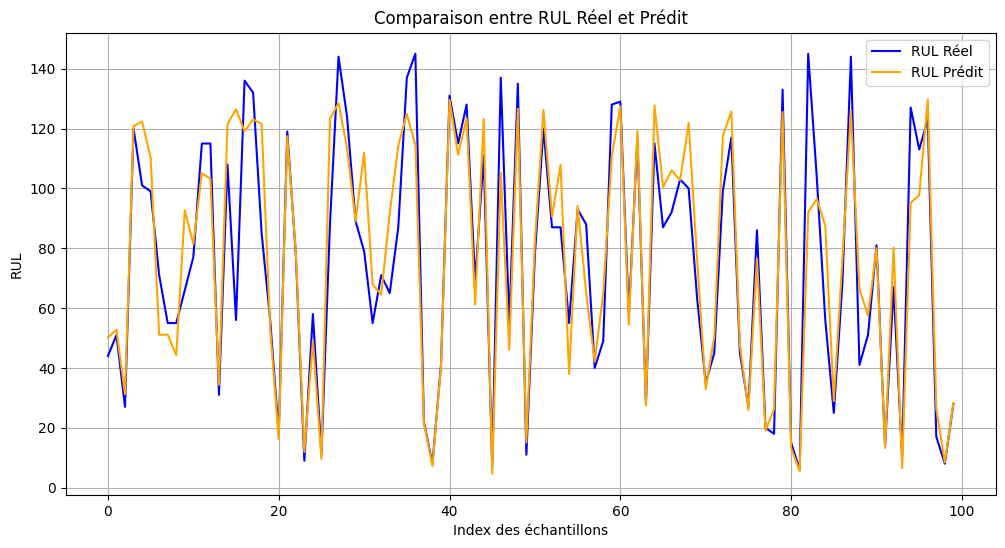

In [7]:
def plot_rul_comparison(y_true, y_pred):
    """
    Visualiser le RUL réel et le RUL prédit.

    Paramètres :
    - y_true : array-like, valeurs réelles de RUL.
    - y_pred : array-like, valeurs prédites de RUL.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label="RUL Réel", color="blue")
    plt.plot(y_pred, label="RUL Prédit", color="orange")
    plt.xlabel("Index des échantillons")
    plt.ylabel("RUL")
    plt.title("Comparaison entre RUL Réel et Prédit")
    plt.legend()
    plt.grid(True)
    plt.show()

# Appel de la fonction pour visualiser
plot_rul_comparison(y_test, y_hat_test)

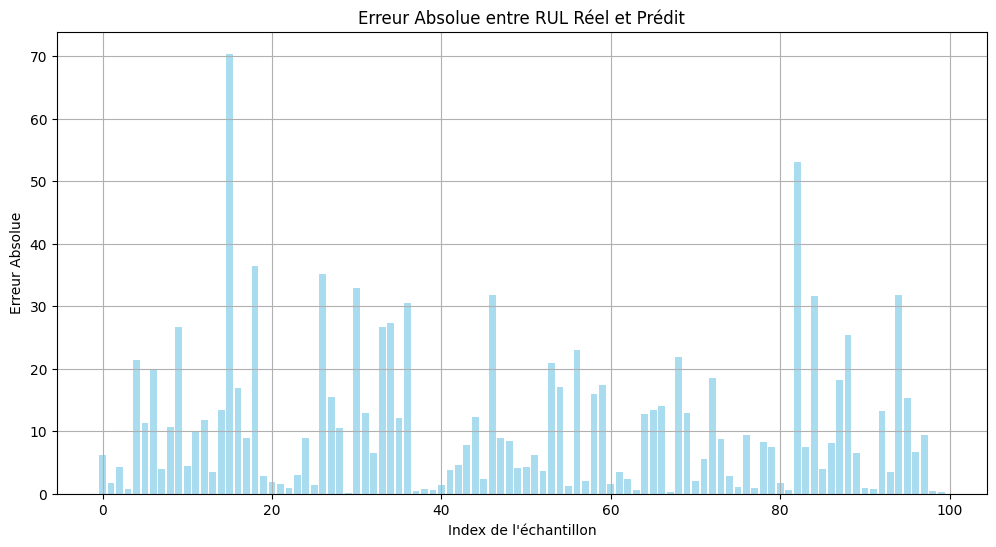

In [8]:
def plot_absolute_error(y_true, y_pred):
    """
    Trace l'erreur absolue entre les valeurs réelles et prédites.

    Paramètres :
    - y_true : RUL réel.
    - y_pred : RUL prédit.
    """
    absolute_error = np.abs(y_true - y_pred)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(absolute_error)), absolute_error, color="skyblue", alpha=0.7)
    plt.xlabel("Index de l'échantillon")
    plt.ylabel("Erreur Absolue")
    plt.title("Erreur Absolue entre RUL Réel et Prédit")
    plt.grid(True)
    plt.show()

# Appel de la fonction
plot_absolute_error(y_test, y_hat_test)